Nikhil Rajendra Dhumal 

21102A0009 

CMPN A

[Github](https://github.com/nikhil-dhumal/ML_Practicals/blob/main/lab_ps_8.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('datasets/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [10]:
scaler = StandardScaler()
std_features = scaler.fit_transform(features)

In [11]:
std_features

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [12]:
dbscan = DBSCAN(eps=0.36, min_samples=4)

dbscan.fit(std_features)

labels = dbscan.labels_

In [13]:
results = pd.DataFrame(std_features, columns=['Income', 'Spending Score'])
data = pd.concat([data, results], axis=1)
data['Cluster'] = labels
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income,Spending Score,Cluster
0,1,Male,19,15,39,-1.738999,-0.434801,2
1,2,Male,21,15,81,-1.738999,1.195704,0
2,3,Female,20,16,6,-1.700830,-1.715913,1
3,4,Female,23,16,77,-1.700830,1.040418,0
4,5,Female,31,17,40,-1.662660,-0.395980,2


In [14]:
data['Cluster'].value_counts()

Cluster
 3    89
 4    33
 5    23
 0    17
-1    15
 1    12
 2     7
 6     4
Name: count, dtype: int64

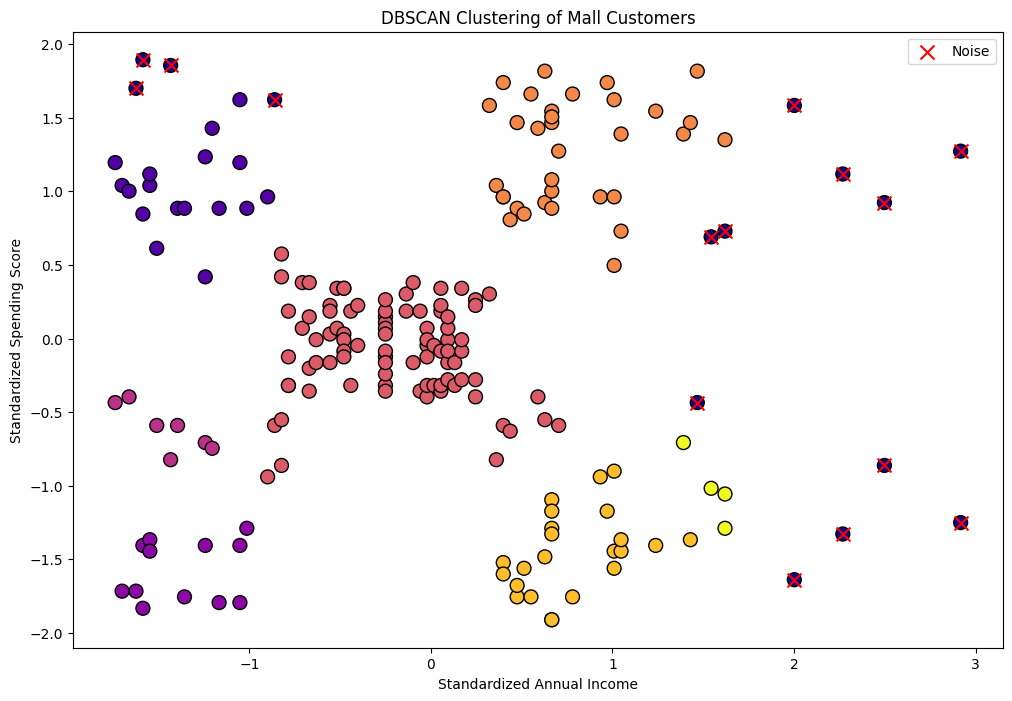

In [15]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['Income'], data['Spending Score'], c=data['Cluster'], cmap ='plasma',marker='o', edgecolor='k', s=100)

plt.scatter(data[data['Cluster'] == -1]['Income'], data[data['Cluster'] == -1]['Spending Score'], color='red', label='Noise', marker='x', s=100)

plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend()
plt.show()

In [16]:
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise_points = list(labels).count(-1)

print(f'Number of clusters: {num_clusters}')
print(f'Number of noise points: {num_noise_points}')

Number of clusters: 7
Number of noise points: 15


In [17]:
cluster_analysis = data[['Annual Income (k$)', 'Spending Score (1-100)','Cluster']].groupby('Cluster').mean()
print(cluster_analysis)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
-1                92.866667               63.733333
 0                25.235294               76.352941
 1                24.583333                9.583333
 2                22.428571               34.428571
 3                55.022472               48.325843
 4                81.060606               83.000000
 5                80.956522               12.782609
 6               101.000000               24.000000
